In [1]:
# import os
# os.makedirs("datasets", exist_ok=True)
# !wget https://dp-public.oss-cn-beijing.aliyuncs.com/community/hERG.csv -O datasets/hERG.csv

### watch data

------------ Original data ------------
                                                 SMILES  pIC50
0     Cc1ccc(CN2[C@@H]3CC[C@H]2C[C@@H](C3)Oc4cccc(c4...   9.85
1     COc1nc2ccc(Br)cc2cc1[C@@H](c3ccccc3)[C@@](O)(C...   9.70
2     NC(=O)c1cccc(O[C@@H]2C[C@H]3CC[C@@H](C2)N3CCCc...   9.60
3                          CCCCCCCc1cccc([n+]1C)CCCCCCC   9.60
4     Cc1ccc(CN2[C@@H]3CC[C@H]2C[C@@H](C3)Oc4cccc(c4...   9.59
...                                                 ...    ...
9199  O=C1[C@H]2N(c3ccc(OCC=CCCNCC(=O)Nc4c(Cl)cc(cc4...   4.89
9200  O=C1[C@H]2N(c3ccc(OCCCCCNCC(=O)Nc4c(Cl)cc(cc4C...   4.89
9201  O=C1[C@H]2N(c3ccc(OCC=CCCCNCC(=O)Nc4c(Cl)cc(cc...   4.89
9202  O=C1[C@H]2N(c3ccc(OCCCCCCNCC(=O)Nc4c(Cl)cc(cc4...   4.49
9203  O=C1N=C/C(=C2\N(c3c(cc(Cl)c(Cl)c3)N\2)Cc4cc(Cl...   5.30

[9204 rows x 2 columns]


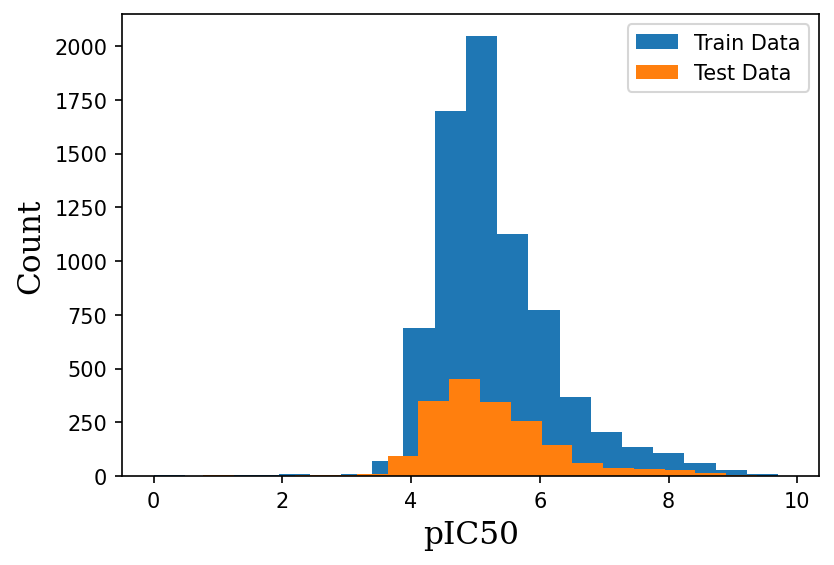

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv("./datasets/hERG.csv")
print("------------ Original data ------------")
print(data)
data.columns = ["SMILES", "TARGET"]

# 将数据集的80%设置为训练数据集，20%设置为测试数据集
train_fraction = 0.8
train_data = data.sample(frac=train_fraction, random_state=1)
train_data.to_csv("./datasets/hERG_train.csv", index=False)
test_data = data.drop(train_data.index)
test_data.to_csv("./datasets/hERG_test.csv", index=False)

# 设定训练/测试目标
train_y = np.array(train_data["TARGET"].values.tolist())
test_y = np.array(test_data["TARGET"].values.tolist())

# 创建一个用来存后面结果的results
results = {}

# 可视化结果
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4), dpi=150)
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 15}
plt.hist(train_data["TARGET"], bins=20, label="Train Data")
plt.hist(test_data["TARGET"], bins=20, label="Test Data")
plt.ylabel("Count", fontdict=font)
plt.xlabel("pIC50", fontdict=font)
plt.legend()
plt.show()

## 1D QASR

In [3]:
from rdkit import Chem
from rdkit.Chem import Descriptors

def calculate_1dqsar_repr(smiles):
    # 从 SMILES 字符串创建分子对象
    mol = Chem.MolFromSmiles(smiles)
    # 计算分子的分子量
    mol_weight = Descriptors.MolWt(mol)
    # 计算分子的 LogP 值
    log_p = Descriptors.MolLogP(mol)
    # 计算分子中的氢键供体数量
    num_h_donors = Descriptors.NumHDonors(mol)
    # 计算分子中的氢键受体数量
    num_h_acceptors = Descriptors.NumHAcceptors(mol)
    # 计算分子的表面积极性
    tpsa = Descriptors.TPSA(mol)
    # 计算分子中的可旋转键数量
    num_rotatable_bonds = Descriptors.NumRotatableBonds(mol)
    # 计算分子中的芳香环数量
    num_aromatic_rings = Descriptors.NumAromaticRings(mol)
    # 计算分子中的脂环数量
    num_aliphatic_rings = Descriptors.NumAliphaticRings(mol)
    # 计算分子中的饱和环数量
    num_saturated_rings = Descriptors.NumSaturatedRings(mol)
    # 计算分子中的杂原子数量
    num_heteroatoms = Descriptors.NumHeteroatoms(mol)
    # 计算分子中的价电子数量
    num_valence_electrons = Descriptors.NumValenceElectrons(mol)
    # 计算分子中的自由基电子数量
    num_radical_electrons = Descriptors.NumRadicalElectrons(mol)
    # 计算分子的 QED 值
    qed = Descriptors.qed(mol)
    # 返回所有计算出的属性值
    return [mol_weight, log_p, num_h_donors, num_h_acceptors, tpsa, num_rotatable_bonds, num_aromatic_rings,
            num_aliphatic_rings, num_saturated_rings, num_heteroatoms, num_valence_electrons, num_radical_electrons,qed]


train_data["1dqsar_mr"] = train_data["SMILES"].apply(calculate_1dqsar_repr)
test_data["1dqsar_mr"] = test_data["SMILES"].apply(calculate_1dqsar_repr)

In [4]:
train_data

,SMILES,TARGET,1dqsar_mr
6244,CCOC[C@H](Oc1ncnc2c1cnn2c3ncccc3Cl)C(=O)Nc4ccc...,4.70,"[464.87300000000016, 2.5531800000000002, 1, 10..."
6275,CC(C)n1c(C)ncc1c2nc(Nc3ccc(cc3)C(=O)N)ncc2F,4.70,"[354.3890000000001, 3.2110200000000004, 2, 6, ..."
2657,CC(=O)N[C@H]1CC(C)(C)Oc2nc(c(cc12)c3ccc(Cl)cc3...,5.58,"[475.8030000000001, 7.114100000000005, 1, 3, 5..."
5727,C[n+]1c(cccc1C#CCOc2ccccc2)C#CCOc3ccccc3,4.85,"[354.4290000000001, 3.3721000000000023, 0, 2, ..."
4653,CN1CCC[C@@H](C1)c2nc3ccccc3n2Cc4ccccn4,5.00,"[306.413, 3.288800000000002, 0, 4, 33.95, 3, 3..."
...,...,...,...
2898,Fc1ccc(nc1)c2cc(ncn2)c3cc(Cl)cc(c3)C#N,5.50,"[310.71900000000005, 3.8697800000000013, 0, 4,..."
6786,CNc1nn2c(C)cc(C)nc2c1S(=O)(=O)c3ccccc3,4.52,"[316.38599999999997, 2.2206400000000004, 1, 6,..."
5480,O=C1[C@@H]2CCN1[C@@H]3CCCc4ccc(Oc5cc(Cn6cncc6C...,4.92,"[439.5190000000001, 3.6768800000000024, 1, 6, ..."
189,OCc1cn(cn1)c2ccc(nn2)N3CCC(CC3)N4CCc5ccc(F)cc45,8.00,"[394.4540000000002, 2.3251999999999997, 1, 7, ..."


In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

# 将训练和测试数据转换为NumPy数组
train_x = np.array(train_data["1dqsar_mr"].values.tolist())
train_y = np.array(train_data["TARGET"].values.tolist())
test_x = np.array(test_data["1dqsar_mr"].values.tolist())
test_y = np.array(test_data["TARGET"].values.tolist())

# 定义要使用的回归器列表
regressors = [
    ("Linear Regression", LinearRegression()), # 线性回归模型
    ("Ridge Regression", Ridge(random_state=42)), # 岭回归模型
    ("Lasso Regression", Lasso(random_state=42)), # Lasso回归模型
    ("ElasticNet Regression", ElasticNet(random_state=42)), # ElasticNet回归模型
    ("Support Vector", SVR()),  # 支持向量回归模型
    ("K-Nearest Neighbors", KNeighborsRegressor()),  # K-最近邻回归模型
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),  # 决策树回归模型
    ("Random Forest", RandomForestRegressor(random_state=42)), # 随机森林回归模型
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)), # 梯度提升回归模型
    ("XGBoost", XGBRegressor(random_state=42)), # XGBoost回归模型
    ("LightGBM", LGBMRegressor(random_state=42)), # LightGBM回归模型
    ("Multi-layer Perceptron", MLPRegressor( # 多层感知器（神经网络）回归模型
        hidden_layer_sizes=(128,64,32),
        learning_rate_init=0.0001,
        activation='relu', solver='adam', 
        max_iter=10000, random_state=42)),
]

# 对每个回归器进行训练和预测，并计算各项性能指标
for name, regressor in regressors:
    # 训练回归器
    regressor.fit(train_x, train_y)
    # 预测训练数据和测试数据
    pred_train_y = regressor.predict(train_x)
    pred_test_y = regressor.predict(test_x)
    # 将预测结果添加到训练数据和测试数据中
    train_data[f"1D-QSAR-{name}_pred"] = pred_train_y
    test_data[f"1D-QSAR-{name}_pred"] = pred_test_y
    # 计算测试数据的性能指标
    mse = mean_squared_error(test_y, pred_test_y)
    se = abs(test_y - pred_test_y)
    results[f"1D-QSAR-{name}"] = {"MSE": mse, "error": se}
    print(f"[1D-QSAR][{name}]\tMSE:{mse:.4f}")

[1D-QSAR][Linear Regression]	MSE:0.8857
[1D-QSAR][Ridge Regression]	MSE:0.8857
[1D-QSAR][Lasso Regression]	MSE:0.9286
[1D-QSAR][ElasticNet Regression]	MSE:0.9269
[1D-QSAR][Support Vector]	MSE:0.9398
[1D-QSAR][K-Nearest Neighbors]	MSE:0.9065
[1D-QSAR][Decision Tree]	MSE:1.0579
[1D-QSAR][Random Forest]	MSE:0.6052
[1D-QSAR][Gradient Boosting]	MSE:0.7607
[1D-QSAR][XGBoost]	MSE:0.6249
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000926 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1232
[LightGBM] [Info] Number of data points in the train set: 7363, number of used features: 12
[LightGBM] [Info] Start training from score 5.279727
[1D-QSAR][LightGBM]	MSE:0.6426
[1D-QSAR][Multi-layer Perceptron]	MSE:0.9385


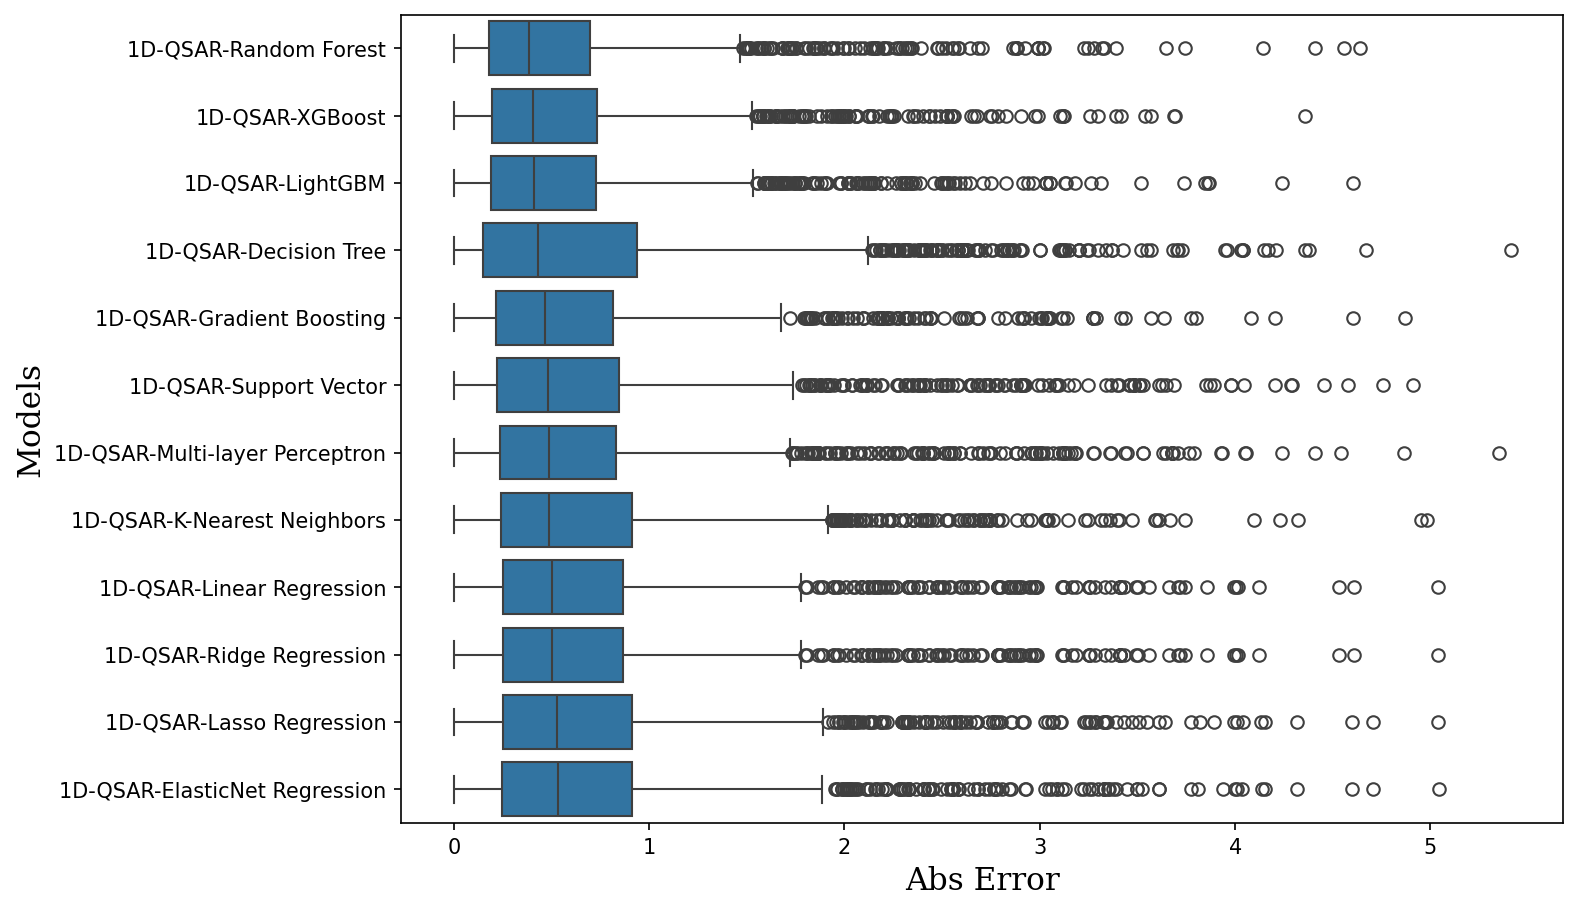

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制残差图
residuals_data = []
for name, result in results.items():
    if name.startswith("1D-QSAR"):
        model_residuals = pd.DataFrame({"Model": name, "Error": result["error"]})
        residuals_data.append(model_residuals)

residuals_df = pd.concat(residuals_data, ignore_index=True)
residuals_df.sort_values(by="Error", ascending=True, inplace=True)
model_order = residuals_df.groupby("Model")["Error"].median().sort_values(ascending=True).index

# 使用seaborn绘制violinplot
plt.figure(figsize=(10, 7), dpi=150)
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 15}
sns.boxplot(y="Model", x="Error", data=residuals_df, order=model_order)
plt.xlabel("Abs Error", fontdict=font)
plt.ylabel("Models", fontdict=font)
plt.show()

In [10]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import os

# 定义 1D-QSAR 特征计算函数
def calculate_1dqsar_repr(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return [
        Descriptors.MolWt(mol), Descriptors.MolLogP(mol), Descriptors.NumHDonors(mol),
        Descriptors.NumHAcceptors(mol), Descriptors.TPSA(mol), Descriptors.NumRotatableBonds(mol),
        Descriptors.NumAromaticRings(mol), Descriptors.NumAliphaticRings(mol), Descriptors.NumSaturatedRings(mol),
        Descriptors.NumHeteroatoms(mol), Descriptors.NumValenceElectrons(mol), Descriptors.NumRadicalElectrons(mol),
        Descriptors.qed(mol)
    ]

# 数据加载（假设 train_data 和 test_data 已存在）
train_data["1dqsar_mr"] = train_data["SMILES"].apply(calculate_1dqsar_repr)
test_data["1dqsar_mr"] = test_data["SMILES"].apply(calculate_1dqsar_repr)

# 转换数据为 NumPy 数组
train_x = np.array(train_data["1dqsar_mr"].values.tolist())
train_y = np.array(train_data["TARGET"].values.tolist())
test_x = np.array(test_data["1dqsar_mr"].values.tolist())
test_y = np.array(test_data["TARGET"].values.tolist())

# 定义回归器列表
regressors = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge(random_state=42)),
    ("Lasso Regression", Lasso(random_state=42)),
    ("ElasticNet Regression", ElasticNet(random_state=42)),
    ("Support Vector", SVR()),
    ("K-Nearest Neighbors", KNeighborsRegressor()),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
    ("XGBoost", XGBRegressor(random_state=42)),
    ("LightGBM", LGBMRegressor(random_state=42)),
    ("Multi-layer Perceptron", MLPRegressor(
        hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001,
        activation='relu', solver='adam', max_iter=10000, random_state=42))
]

# 保存预测值的文件夹
output_folder = "model_predictions"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 训练模型并保存结果
results = {}
for name, regressor in regressors:
    regressor.fit(train_x, train_y)
    pred_test_y = regressor.predict(test_x)
    
    # 保存预测值到 CSV
    model_results = pd.DataFrame({"True_Values": test_y, "Predicted_Values": pred_test_y})
    csv_path = os.path.join(output_folder, f"{name}_predictions.csv")
    model_results.to_csv(csv_path, index=False)
    
    # 计算性能指标
    mse = mean_squared_error(test_y, pred_test_y)
    results[name] = {"MSE": mse}
    print(f"[1D-QSAR][{name}] MSE: {mse:.4f}")

# 绘制散点图
# 修改后的绘图代码，调整图大小和字体，并确保保存图片时内容显示完整
for name, regressor in regressors:
    csv_path = os.path.join(output_folder, f"{name}_predictions.csv")
    data = pd.read_csv(csv_path)

    plt.figure(figsize=(4, 4))
    plt.scatter(data["True_Values"], data["Predicted_Values"], alpha=0.7, label="Predictions")
    plt.plot(
        [data["True_Values"].min(), data["True_Values"].max()],
        [data["True_Values"].min(), data["True_Values"].max()],
        color="red", linestyle="--", label="Perfect Prediction (y=x)"
    )

    plt.title(f"{name}", fontsize=12)
    plt.xlabel("True Values", fontsize=12)
    plt.ylabel("Predicted Values", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.3)

    # 确保保存图片时显示完整
    plt.tight_layout()
    plt.savefig(os.path.join(output_folder, f"{name}_scatter_plot.png"))
    plt.close()

print("调整后的图像已保存。")

[1D-QSAR][Linear Regression] MSE: 0.8857
[1D-QSAR][Ridge Regression] MSE: 0.8857
[1D-QSAR][Lasso Regression] MSE: 0.9286
[1D-QSAR][ElasticNet Regression] MSE: 0.9269
[1D-QSAR][Support Vector] MSE: 0.9398
[1D-QSAR][K-Nearest Neighbors] MSE: 0.9065
[1D-QSAR][Decision Tree] MSE: 1.0579
[1D-QSAR][Random Forest] MSE: 0.6052
[1D-QSAR][Gradient Boosting] MSE: 0.7607
[1D-QSAR][XGBoost] MSE: 0.6249
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000552 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1232
[LightGBM] [Info] Number of data points in the train set: 7363, number of used features: 12
[LightGBM] [Info] Start training from score 5.279727
[1D-QSAR][LightGBM] MSE: 0.6426
[1D-QSAR][Multi-layer Perceptron] MSE: 0.9385
调整后的图像已保存。


In [11]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define a function to calculate 1D-QSAR descriptors from SMILES strings
def calculate_1dqsar_repr(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return [
        Descriptors.MolWt(mol),  # Molecular weight
        Descriptors.MolLogP(mol),  # LogP value
        Descriptors.NumHDonors(mol),  # Number of H-bond donors
        Descriptors.NumHAcceptors(mol),  # Number of H-bond acceptors
        Descriptors.TPSA(mol),  # Topological polar surface area
        Descriptors.NumRotatableBonds(mol),  # Number of rotatable bonds
        Descriptors.NumAromaticRings(mol),  # Number of aromatic rings
        Descriptors.NumAliphaticRings(mol),  # Number of aliphatic rings
        Descriptors.NumSaturatedRings(mol),  # Number of saturated rings
        Descriptors.NumHeteroatoms(mol),  # Number of heteroatoms
        Descriptors.NumValenceElectrons(mol),  # Number of valence electrons
        Descriptors.NumRadicalElectrons(mol),  # Number of radical electrons
        Descriptors.qed(mol)  # Quantitative estimate of drug-likeness (QED)
    ]

# Apply the descriptor function to train and test data
train_data["1dqsar_mr"] = train_data["SMILES"].apply(calculate_1dqsar_repr)
test_data["1dqsar_mr"] = test_data["SMILES"].apply(calculate_1dqsar_repr)

# Convert feature and target columns to NumPy arrays
train_x = np.array(train_data["1dqsar_mr"].values.tolist())
train_y = np.array(train_data["TARGET"].values.tolist())
test_x = np.array(test_data["1dqsar_mr"].values.tolist())
test_y = np.array(test_data["TARGET"].values.tolist())

# Apply Min-Max normalization to the features
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)  # Normalize training data
test_x = scaler.transform(test_x)  # Apply the same normalization to test data

# Define a list of regression models
regressors = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge(random_state=42)),
    ("Lasso Regression", Lasso(random_state=42)),
    ("ElasticNet Regression", ElasticNet(random_state=42)),
    ("Support Vector", SVR()),
    ("K-Nearest Neighbors", KNeighborsRegressor()),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
    ("XGBoost", XGBRegressor(random_state=42)),
    ("LightGBM", LGBMRegressor(random_state=42)),
    ("Multi-layer Perceptron", MLPRegressor(
        hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001,
        activation='relu', solver='adam', max_iter=10000, random_state=42))
]

# Create a directory to save prediction results and plots
output_folder = "model_predictions_normalized"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Train each model, save predictions, and calculate MSE
results = {}
for name, regressor in regressors:
    regressor.fit(train_x, train_y)  # Train the model
    pred_test_y = regressor.predict(test_x)  # Make predictions on the test set

    # Save true and predicted values to a CSV file
    model_results = pd.DataFrame({"True_Values": test_y, "Predicted_Values": pred_test_y})
    csv_path = os.path.join(output_folder, f"{name}_predictions.csv")
    model_results.to_csv(csv_path, index=False)

    # Calculate and print the Mean Squared Error (MSE)
    mse = mean_squared_error(test_y, pred_test_y)
    results[name] = {"MSE": mse}
    print(f"[1D-QSAR][{name}] MSE: {mse:.4f}")

# Generate scatter plots for each model's predictions
for name, regressor in regressors:
    csv_path = os.path.join(output_folder, f"{name}_predictions.csv")
    data = pd.read_csv(csv_path)

    # Create the scatter plot
    plt.figure(figsize=(4, 4))
    plt.scatter(data["True_Values"], data["Predicted_Values"], alpha=0.7, label="Predictions")
    plt.plot(
        [0, max(data["True_Values"].max(), data["Predicted_Values"].max())],
        [0, max(data["True_Values"].max(), data["Predicted_Values"].max())],
        color="red", linestyle="--", label="Perfect Prediction (y=x)"
    )

    # Set plot labels, title, and grid
    plt.title(f"{name}", fontsize=12)
    plt.xlabel("True Values", fontsize=12)
    plt.ylabel("Predicted Values", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.3)

    # Ensure plot content fits within the saved image
    plt.xlim(0, max(data["True_Values"].max(), data["Predicted_Values"].max()))
    plt.ylim(0, max(data["True_Values"].max(), data["Predicted_Values"].max()))
    plt.tight_layout()
    plt.savefig(os.path.join(output_folder, f"{name}_scatter_plot.png"), dpi=300)
    plt.close()

print("Normalized predictions and scatter plots have been saved.")

[1D-QSAR][Linear Regression] MSE: 0.8857
[1D-QSAR][Ridge Regression] MSE: 0.8852
[1D-QSAR][Lasso Regression] MSE: 1.0109
[1D-QSAR][ElasticNet Regression] MSE: 1.0109
[1D-QSAR][Support Vector] MSE: 0.8099
[1D-QSAR][K-Nearest Neighbors] MSE: 0.6941
[1D-QSAR][Decision Tree] MSE: 1.0583
[1D-QSAR][Random Forest] MSE: 0.6064
[1D-QSAR][Gradient Boosting] MSE: 0.7609
[1D-QSAR][XGBoost] MSE: 0.6249
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000512 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1232
[LightGBM] [Info] Number of data points in the train set: 7363, number of used features: 12
[LightGBM] [Info] Start training from score 5.279727
[1D-QSAR][LightGBM] MSE: 0.6440
[1D-QSAR][Multi-layer Perceptron] MSE: 0.7217
Normalized predictions and scatter plots have been saved.


In [25]:
# Prepare the MSE data for saving to CSV and sort by MSE in ascending order
mse_data = [{"Model": name, "MSE": result["MSE"]} for name, result in results.items()]

# Convert the data into a DataFrame
mse_df = pd.DataFrame(mse_data)

# Sort the DataFrame by MSE in ascending order
mse_df = mse_df.sort_values(by="MSE", ascending=True)

# Save the sorted DataFrame to a CSV file
mse_csv_path = "1d_qasr_mse_sorted.csv"
mse_df.to_csv(mse_csv_path, index=False)

# Confirm the file was saved successfully
print(f"Sorted MSE results have been saved to {mse_csv_path}")

Sorted MSE results have been saved to 1d_qasr_mse_sorted.csv


In [31]:
len(train_data['1dqsar_mr'][1])

13

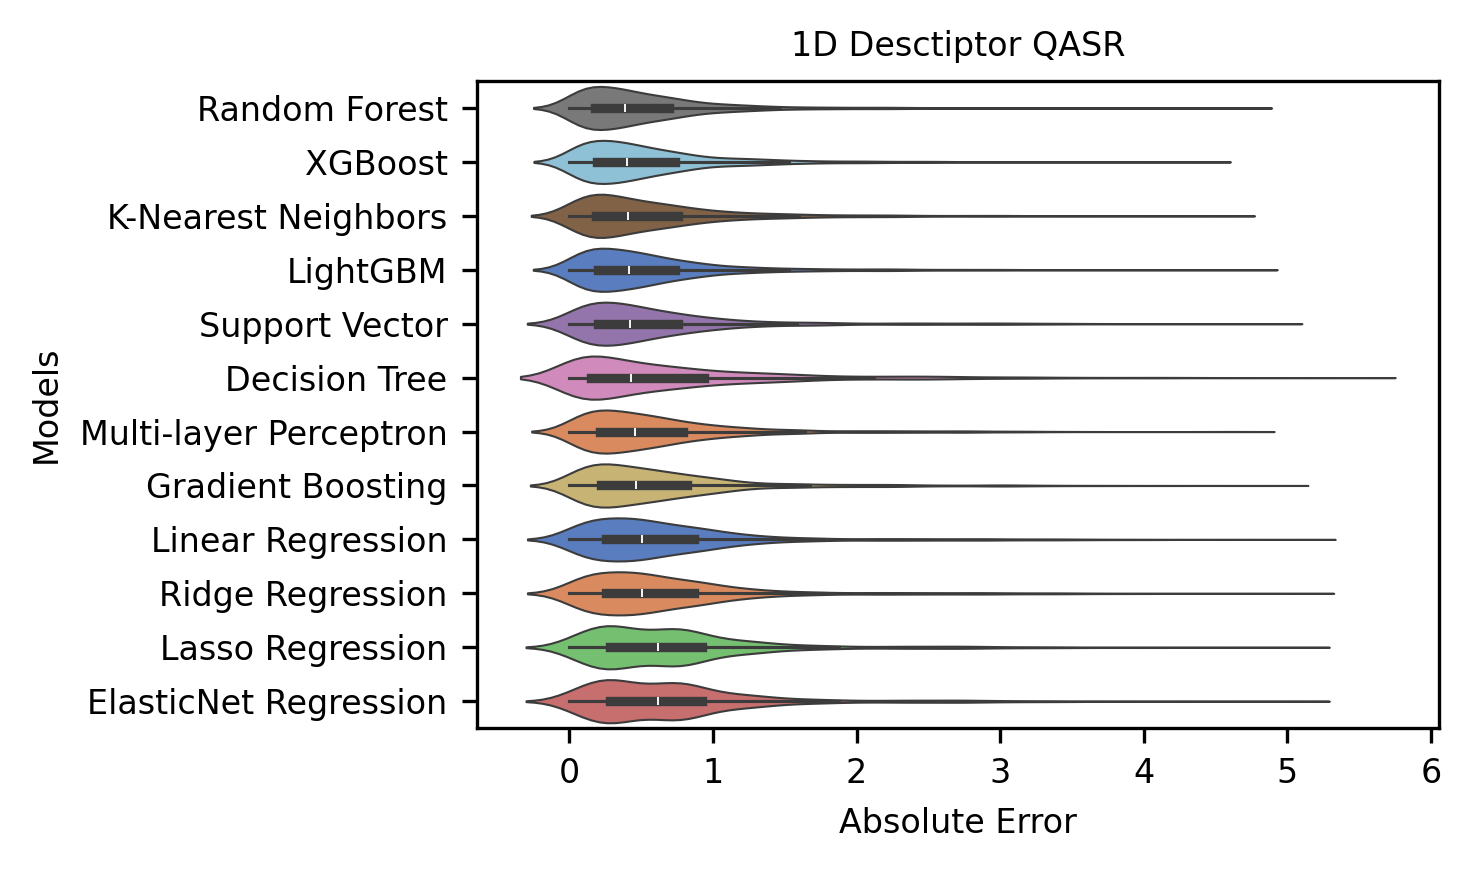

In [23]:
# Prepare residuals data for the violin plot
residuals_data = []

for name, regressor in regressors:
    # Load the predictions for each model
    csv_path = os.path.join(output_folder, f"{name}_predictions.csv")
    data = pd.read_csv(csv_path)

    # Calculate residuals (absolute errors)
    residuals = abs(data["True_Values"] - data["Predicted_Values"])
    model_residuals = pd.DataFrame({"Model": name, "Error": residuals})
    residuals_data.append(model_residuals)

# Concatenate all residuals into a single DataFrame
residuals_df = pd.concat(residuals_data, ignore_index=True)

# Determine model order by median error
model_order = residuals_df.groupby("Model")["Error"].median().sort_values(ascending=True).index


# Adjusted code to remove warnings and fix font size for axis labels

# Generate violin plot with academic aesthetics
plt.figure(figsize=(5, 3), dpi=300)

# Use seaborn to create a violin plot, with updated parameters to remove warnings
sns.violinplot(
    x="Error", 
    y="Model", 
    data=residuals_df, 
    order=model_order, 
    hue="Model", 
    dodge=False, 
    legend=False, 
    density_norm="width",  # Replace deprecated "scale"
    palette="muted",
    linewidth=0.5  # Set thinner line width
)

# Set labels and adjust font sizes
font = {'family': 'serif',
        'color': 'black',
        'weight': 'normal',
        'size': 8}  # Reduced size for axis labels
plt.title("1D Desctiptor QASR", fontsize=8)
plt.xlabel("Absolute Error",fontsize=8)
plt.ylabel("Models",fontsize=8)
plt.xticks(fontsize=8)  # Smaller tick font size
plt.yticks(fontsize=8)  # Smaller tick font size

# Apply a tight layout for academic aesthetics
plt.tight_layout()
plt.savefig("1d_qasr_violin_plot.png")
# Show the plot
plt.show()

## 2D QASR

In [46]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator

def calculate_2dqsar_repr(smiles):
    # 将 SMILES 字符串转换为 RDKit 分子对象
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None  # 如果 SMILES 无效，返回 None
    
    # 使用 rdFingerprintGenerator 生成 Morgan 指纹（半径为3，长度为512位）
    generator = rdFingerprintGenerator.GetMorganGenerator(radius=3, fpSize=512)
    fp = generator.GetFingerprint(mol)
    
    # 将指纹转为 numpy 数组并返回
    return np.array(fp)

# 对训练和测试数据生成 Morgan 指纹
train_data["2dqsar_mr"] = train_data["SMILES"].apply(calculate_2dqsar_repr)
test_data["2dqsar_mr"] = test_data["SMILES"].apply(calculate_2dqsar_repr)

# 打印结果中是否有 None 值
print("Training data null values:", train_data["2dqsar_mr"].isnull().sum())
print("Testing data null values:", test_data["2dqsar_mr"].isnull().sum())

Training data null values: 0
Testing data null values: 0


In [49]:
# print(train_data["2dqsar_mr"][:].values.tolist())

In [50]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

# 将训练和测试数据转换为NumPy数组
train_x = np.array(train_data["2dqsar_mr"].values.tolist())
train_y = np.array(train_data["TARGET"].values.tolist())
test_x = np.array(test_data["2dqsar_mr"].values.tolist())
test_y = np.array(test_data["TARGET"].values.tolist())

# 定义要使用的回归器列表
regressors = [
    ("Linear Regression", LinearRegression()), # 线性回归模型
    ("Ridge Regression", Ridge(random_state=42)), # 岭回归模型
    ("Lasso Regression", Lasso(random_state=42)), # Lasso回归模型
    ("ElasticNet Regression", ElasticNet(random_state=42)), # ElasticNet回归模型
    ("Support Vector", SVR()),  # 支持向量回归模型
    ("K-Nearest Neighbors", KNeighborsRegressor()),  # K-最近邻回归模型
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),  # 决策树回归模型
    ("Random Forest", RandomForestRegressor(random_state=42)), # 随机森林回归模型
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)), # 梯度提升回归模型
    ("XGBoost", XGBRegressor(random_state=42)), # XGBoost回归模型
    ("LightGBM", LGBMRegressor(random_state=42)), # LightGBM回归模型
    ("Multi-layer Perceptron", MLPRegressor( # 多层感知器（神经网络）回归模型
        hidden_layer_sizes=(128,64,32),
        learning_rate_init=0.0001,
        activation='relu', solver='adam', 
        max_iter=10000, random_state=42)),
]

# 对每个回归器进行训练和预测，并计算各项性能指标
for name, regressor in regressors:
    # 训练回归器
    regressor.fit(train_x, train_y)
    # 预测训练数据和测试数据
    pred_train_y = regressor.predict(train_x)
    pred_test_y = regressor.predict(test_x)
    # 将预测结果添加到训练数据和测试数据中
    train_data[f"2D-QSAR-{name}_pred"] = pred_train_y
    test_data[f"2D-QSAR-{name}_pred"] = pred_test_y
    # 计算测试数据的性能指标
    mse = mean_squared_error(test_y, pred_test_y)
    se = abs(test_y - pred_test_y)
    results[f"2D-QSAR-{name}"] = {"MSE": mse, "error": se}
    print(f"[2D-QSAR][{name}]\tMSE:{mse:.4f}")


[2D-QSAR][Linear Regression]	MSE:0.7156
[2D-QSAR][Ridge Regression]	MSE:0.7154
[2D-QSAR][Lasso Regression]	MSE:1.0109
[2D-QSAR][ElasticNet Regression]	MSE:1.0109
[2D-QSAR][Support Vector]	MSE:0.4554
[2D-QSAR][K-Nearest Neighbors]	MSE:0.4806
[2D-QSAR][Decision Tree]	MSE:0.8892
[2D-QSAR][Random Forest]	MSE:0.4717
[2D-QSAR][Gradient Boosting]	MSE:0.6694
[2D-QSAR][XGBoost]	MSE:0.4796
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036892 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1024
[LightGBM] [Info] Number of data points in the train set: 7363, number of used features: 512
[LightGBM] [Info] Start training from score 5.279727
[2D-QSAR][LightGBM]	MSE:0.4797
[2D-QSAR][Multi-layer Perceptron]	MSE:0.6933


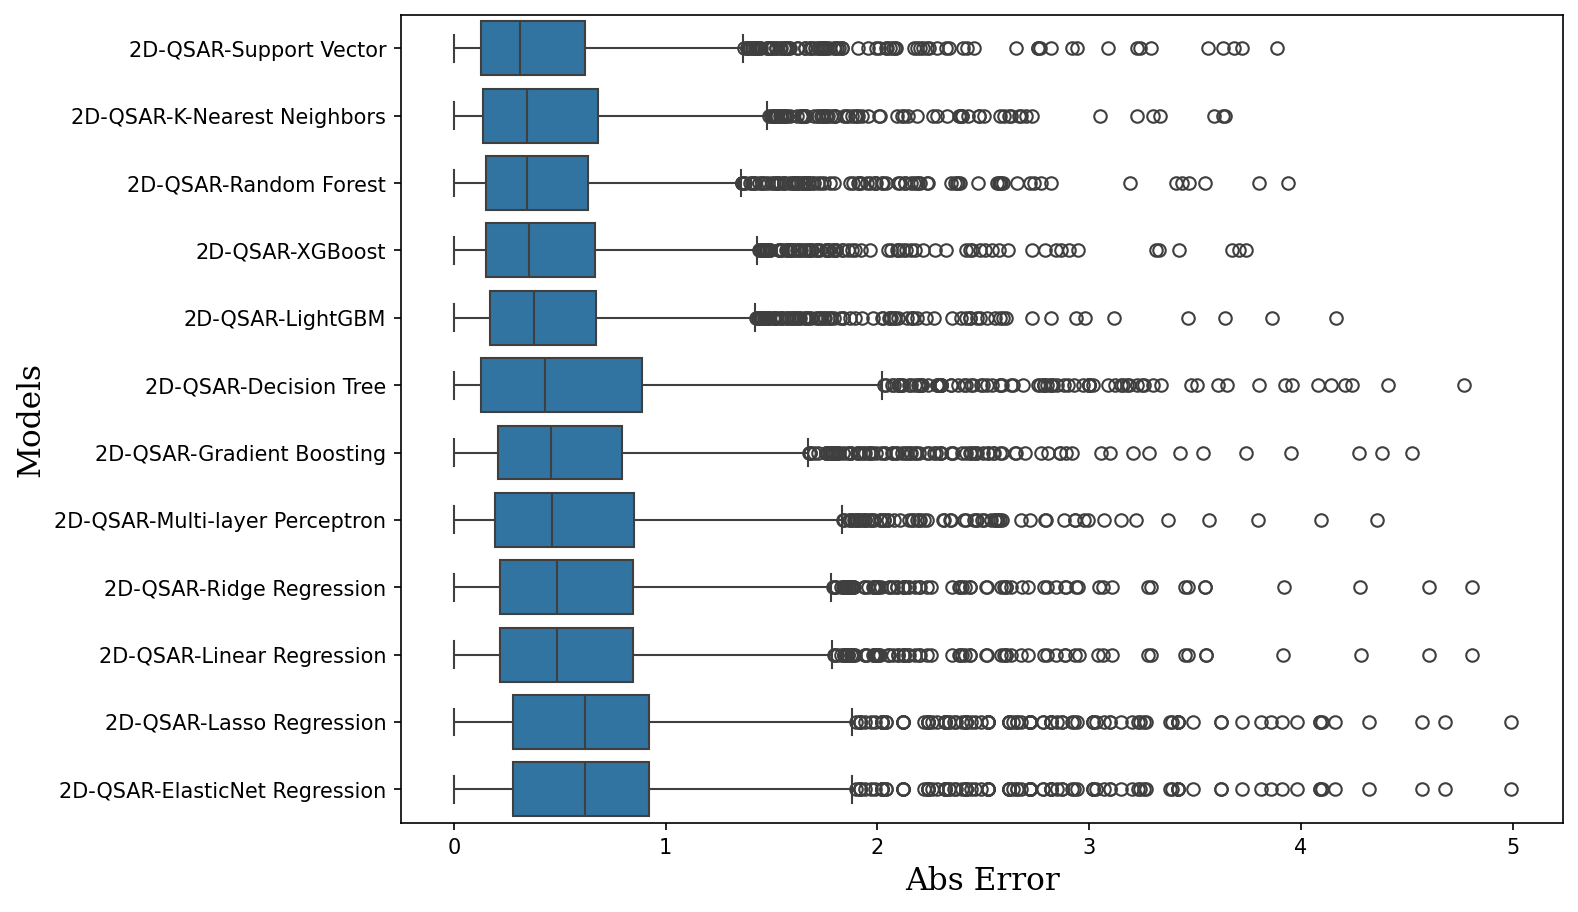

In [51]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制残差图
residuals_data = []
for name, result in results.items():
    if name.startswith("2D-QSAR"):
        model_residuals = pd.DataFrame({"Model": name, "Error": result["error"]})
        residuals_data.append(model_residuals)

residuals_df = pd.concat(residuals_data, ignore_index=True)
residuals_df.sort_values(by="Error", ascending=True, inplace=True)
model_order = residuals_df.groupby("Model")["Error"].median().sort_values(ascending=True).index

# 使用seaborn绘制violinplot
plt.figure(figsize=(10, 7), dpi=150)
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 15}
sns.boxplot(y="Model", x="Error", data=residuals_df, order=model_order)
plt.xlabel("Abs Error", fontdict=font)
plt.ylabel("Models", fontdict=font)
plt.show()

/tmp/ipykernel_3326911/193010047.py:23: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(y="Model", x="Error", data=residuals_df, order=model_order, scale="width", inner="box")


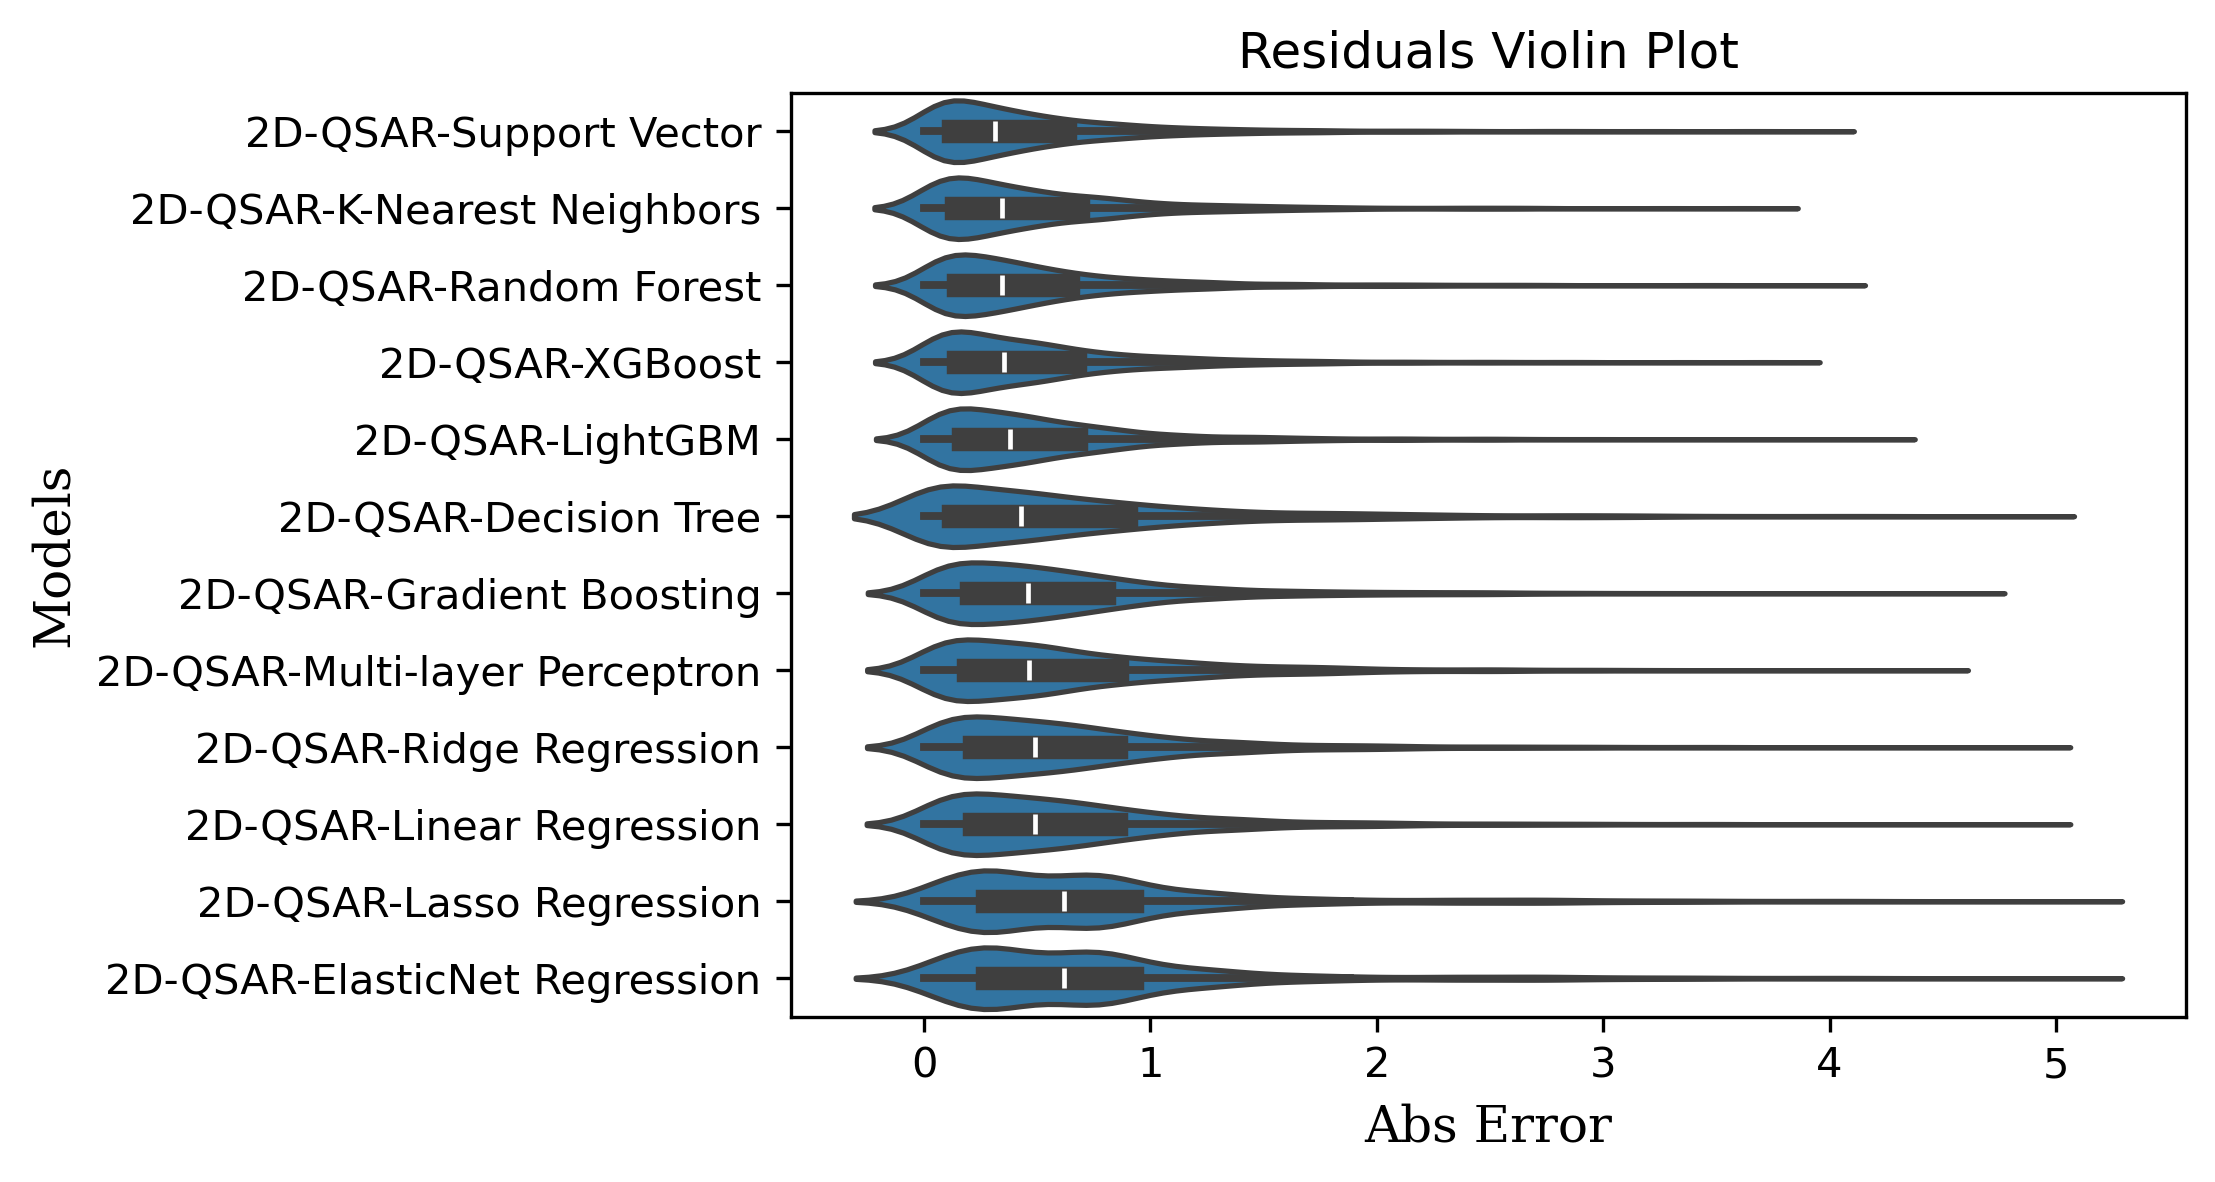

In [56]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 绘制残差图
residuals_data = []
for name, result in results.items():
    if name.startswith("2D-QSAR"):
        model_residuals = pd.DataFrame({"Model": name, "Error": result["error"]})
        residuals_data.append(model_residuals)

residuals_df = pd.concat(residuals_data, ignore_index=True)
residuals_df.sort_values(by="Error", ascending=True, inplace=True)
model_order = residuals_df.groupby("Model")["Error"].median().sort_values(ascending=True).index

# 使用seaborn绘制violinplot
plt.figure(figsize=(6, 4), dpi=300)
font = {'family': 'serif',
        'color': 'black',
        'weight': 'normal',
        'size': 12}
sns.violinplot(y="Model", x="Error", data=residuals_df, order=model_order, scale="width", inner="box")
plt.xlabel("Abs Error", fontdict=font)
plt.ylabel("Models", fontdict=font)
plt.title("Residuals Violin Plot", fontsize=12)
plt.show()


/tmp/ipykernel_3326911/1947481013.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipykernel_3326911/1947481013.py:28: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


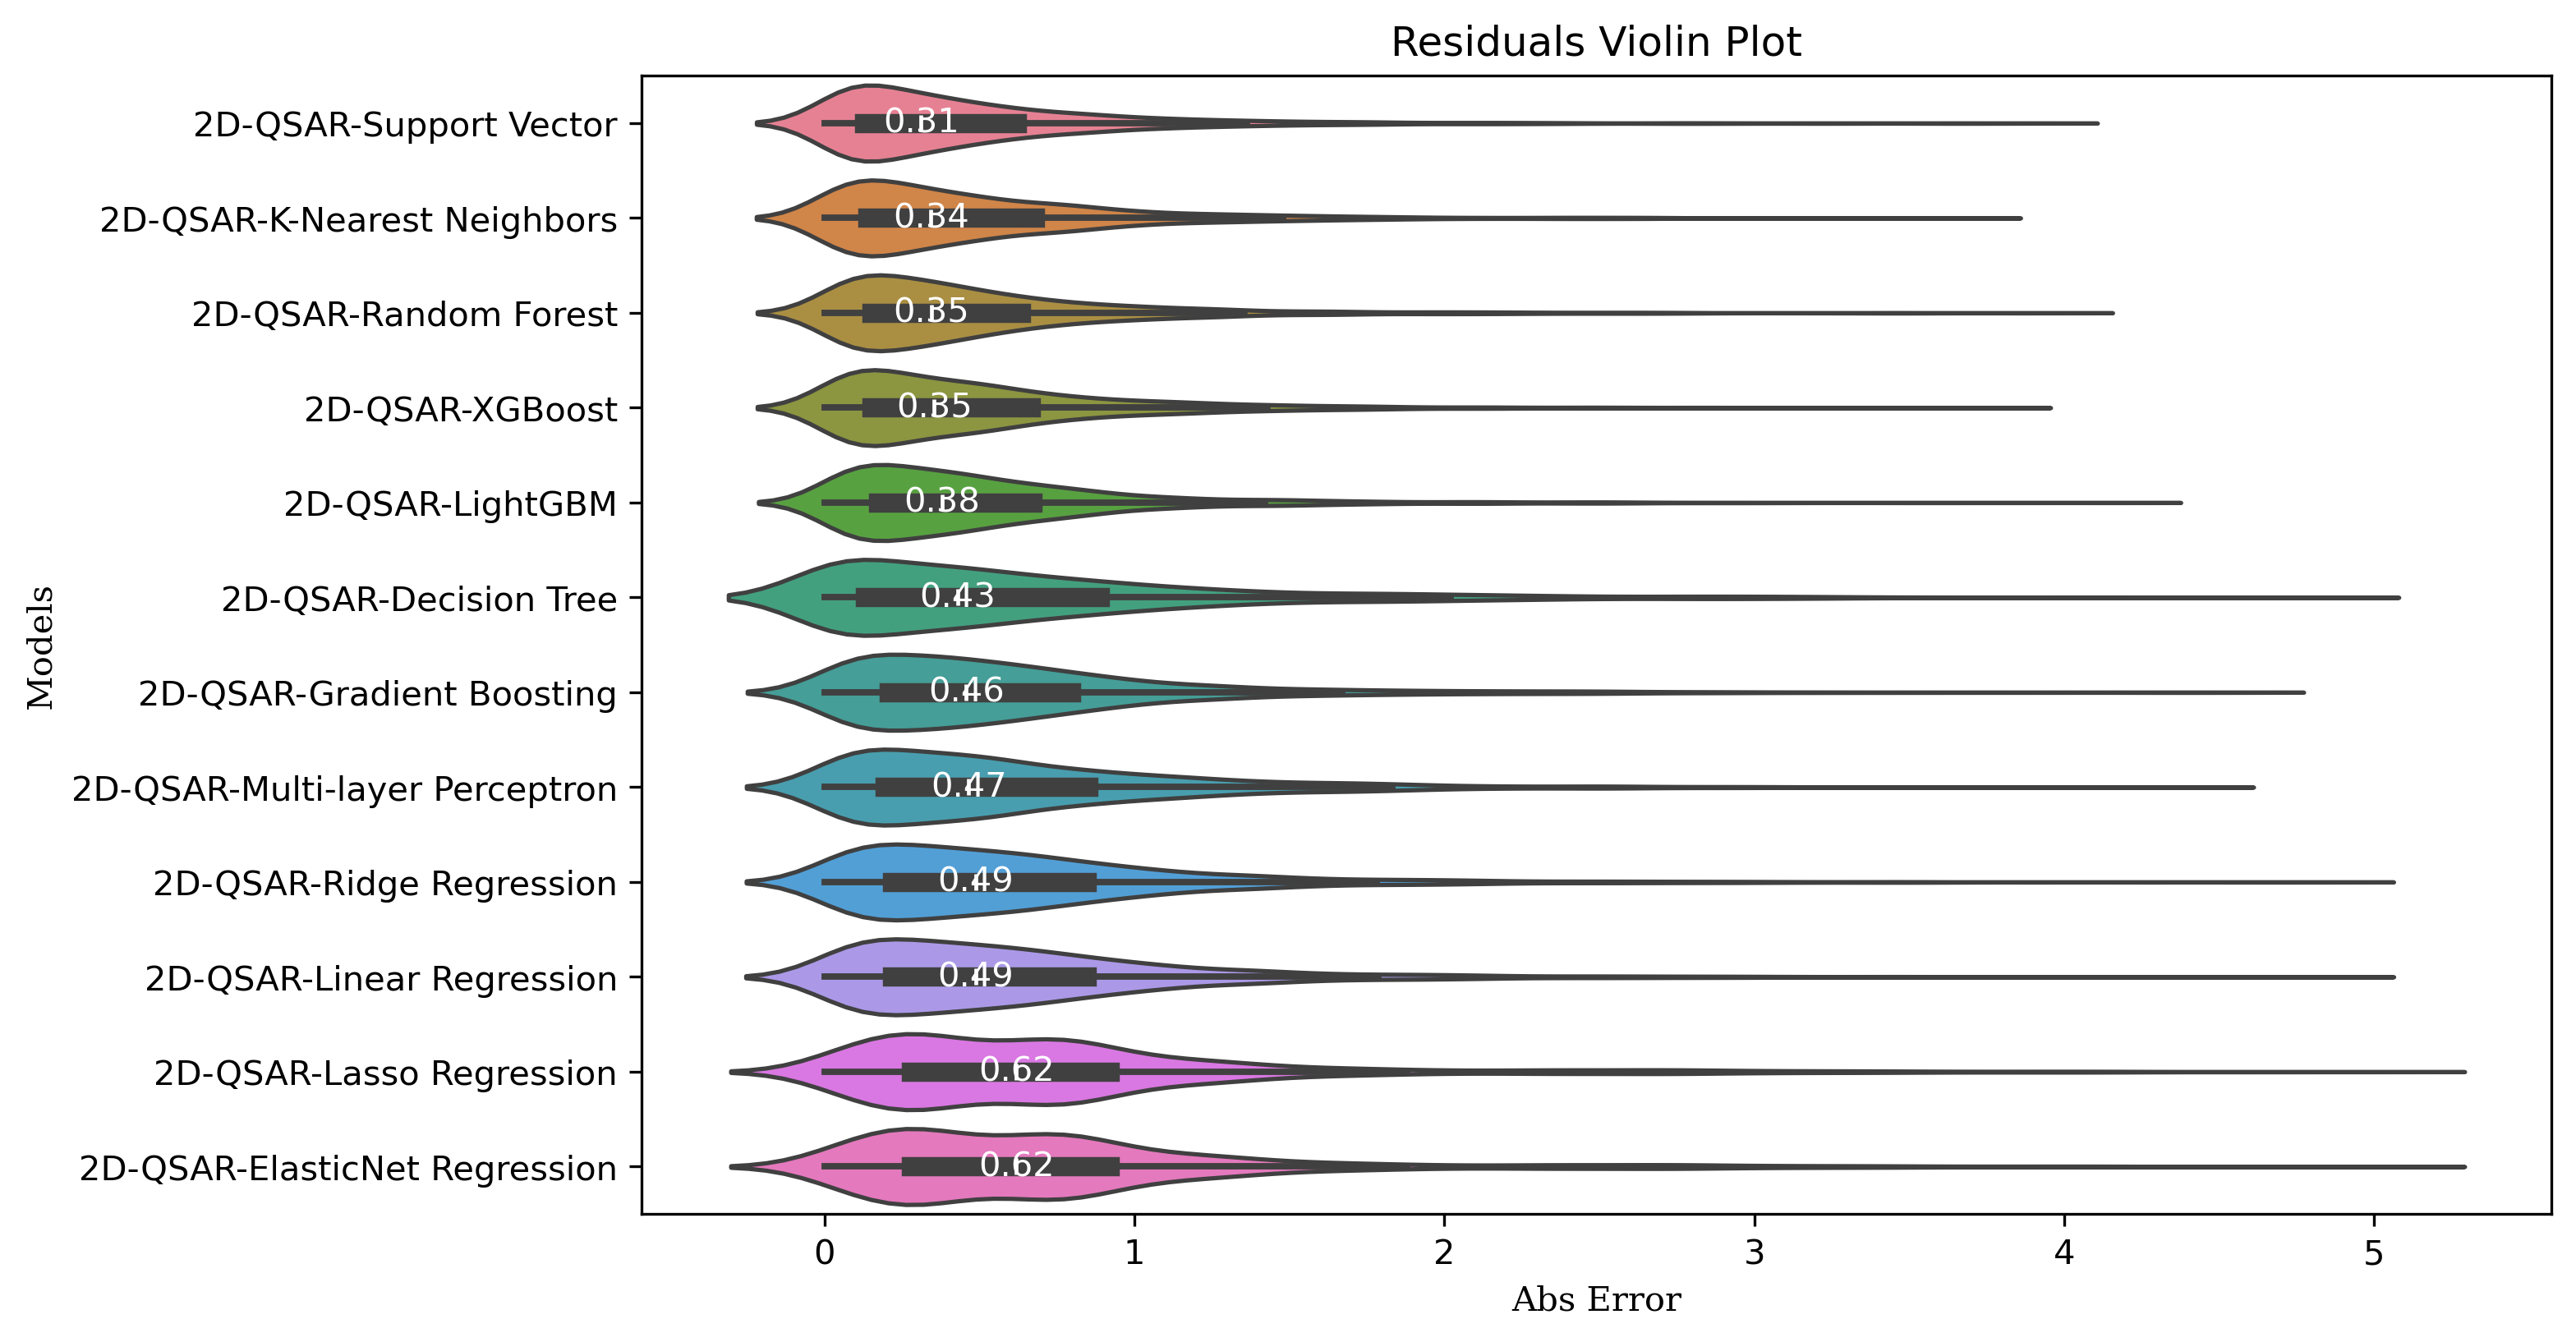

In [65]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 绘制残差图
residuals_data = []
for name, result in results.items():
    if name.startswith("2D-QSAR"):
        model_residuals = pd.DataFrame({"Model": name, "Error": result["error"]})
        residuals_data.append(model_residuals)

residuals_df = pd.concat(residuals_data, ignore_index=True)
residuals_df.sort_values(by="Error", ascending=True, inplace=True)
model_order = residuals_df.groupby("Model")["Error"].median().sort_values(ascending=True).index

# 设置颜色映射
palette = sns.color_palette("husl", len(model_order))

# 使用seaborn绘制violinplot
plt.figure(figsize=(10, 6), dpi=300)
font = {'family': 'serif',
        'color': 'black',
        'weight': 'normal',
        'size': 10}

sns.violinplot(
    y="Model",
    x="Error",
    data=residuals_df,
    order=model_order,
    scale="width",
    inner="box",
    palette=palette
)

# 添加中位数标注
for index, model in enumerate(model_order):
    median_value = residuals_df[residuals_df["Model"] == model]["Error"].median()
    plt.text(
        median_value,  # x 坐标为中位数值
        index,         # y 坐标为小提琴图的索引
        f"{median_value:.2f}",  # 标注格式化为两位小数
        ha="center", va="center", fontsize=10, color="white"
    )

# 设置标题和坐标轴标签
plt.xlabel("Abs Error", fontdict=font)
plt.ylabel("Models", fontdict=font)
plt.title("Residuals Violin Plot", fontsize=12)
plt.show()


### 3D-QASR

In [66]:
from rdkit.Chem import rdPartialCharges

def calculate_3dqsar_repr(SMILES, max_atoms=100, three_d=False):
    mol = Chem.MolFromSmiles(SMILES)  # 从SMILES表示创建分子对象
    mol = Chem.AddHs(mol)  # 添加氢原子
    if three_d:
        AllChem.EmbedMolecule(mol, AllChem.ETKDG())  # 计算3D坐标
    else:
        AllChem.Compute2DCoords(mol)  # 计算2D坐标
    natoms = mol.GetNumAtoms()  # 获取原子数量
    rdPartialCharges.ComputeGasteigerCharges(mol)  # 计算分子的Gasteiger电荷
    charges = np.array([float(atom.GetProp("_GasteigerCharge")) for atom in mol.GetAtoms()])  # 获取电荷值
    coords = mol.GetConformer().GetPositions()  # 获取原子坐标
    coulomb_matrix = np.zeros((max_atoms, max_atoms))  # 初始化库仑矩阵
    n = min(max_atoms, natoms)
    for i in range(n):  # 遍历原子
        for j in range(i, n):
            if i == j:
                coulomb_matrix[i, j] = 0.5 * charges[i] ** 2
            if i != j:
                delta = np.linalg.norm(coords[i] - coords[j])  # 计算原子间距离
                if delta != 0:
                    coulomb_matrix[i, j] = charges[i] * charges[j] / delta  # 计算库仑矩阵的元素值
                    coulomb_matrix[j, i] = coulomb_matrix[i, j]
    coulomb_matrix = np.where(np.isinf(coulomb_matrix), 0, coulomb_matrix)  # 处理无穷大值
    coulomb_matrix = np.where(np.isnan(coulomb_matrix), 0, coulomb_matrix)  # 处理NaN值
    return coulomb_matrix.reshape(max_atoms*max_atoms).tolist()  # 将库仑矩阵转换为列表并返回


train_data["3dqsar_mr"] = train_data["SMILES"].apply(calculate_3dqsar_repr) 
test_data["3dqsar_mr"] = test_data["SMILES"].apply(calculate_3dqsar_repr) 

In [67]:
from sklearn.decomposition import PCA

# 定义 PCA 对象，n_components 设置为512，表示降维到512维
pca = PCA(n_components=512)

# 拟合训练数据并转换
train_data_pca = pca.fit_transform(np.array(train_data["3dqsar_mr"].tolist()))

# 转换测试数据
test_data_pca = pca.transform(np.array(test_data["3dqsar_mr"].tolist()))

# 将降维后的数据存储为新的列
train_data["3dqsar_mr_pca"] = train_data_pca.tolist()
test_data["3dqsar_mr_pca"] = test_data_pca.tolist()

In [68]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

# 将训练和测试数据转换为NumPy数组
train_x = np.array(train_data["3dqsar_mr_pca"].values.tolist())
train_y = np.array(train_data["TARGET"].values.tolist())
test_x = np.array(test_data["3dqsar_mr_pca"].values.tolist())
test_y = np.array(test_data["TARGET"].values.tolist())

# 定义要使用的回归器列表
regressors = [
    ("Linear Regression", LinearRegression()), # 线性回归模型
    ("Ridge Regression", Ridge(random_state=42)), # 岭回归模型
    ("Lasso Regression", Lasso(random_state=42)), # Lasso回归模型
    ("ElasticNet Regression", ElasticNet(random_state=42)), # ElasticNet回归模型
    ("Support Vector", SVR()),  # 支持向量回归模型
    ("K-Nearest Neighbors", KNeighborsRegressor()),  # K-最近邻回归模型
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),  # 决策树回归模型
    ("Random Forest", RandomForestRegressor(random_state=42)), # 随机森林回归模型
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)), # 梯度提升回归模型
    ("XGBoost", XGBRegressor(random_state=42)), # XGBoost回归模型
    ("LightGBM", LGBMRegressor(random_state=42)), # LightGBM回归模型
    ("Multi-layer Perceptron", MLPRegressor( # 多层感知器（神经网络）回归模型
        hidden_layer_sizes=(128,64,32),
        learning_rate_init=0.0001,
        activation='relu', solver='adam', 
        max_iter=10000, random_state=42)),
]

# 对每个回归器进行训练和预测，并计算各项性能指标
for name, regressor in regressors:
    # 训练回归器
    regressor.fit(train_x, train_y)
    # 预测训练数据和测试数据
    pred_train_y = regressor.predict(train_x)
    pred_test_y = regressor.predict(test_x)
    # 将预测结果添加到训练数据和测试数据中
    train_data[f"3D-QSAR-{name}_pred"] = pred_train_y
    test_data[f"3D-QSAR-{name}_pred"] = pred_test_y
    # 计算测试数据的性能指标
    mse = mean_squared_error(test_y, pred_test_y)
    se = abs(test_y - pred_test_y)
    results[f"3D-QSAR-{name}"] = {"MSE": mse, "error": se}
    print(f"[3D-QSAR][{name}]\tMSE:{mse:.4f}")

[3D-QSAR][Linear Regression]	MSE:55065019533420410267762688.0000
[3D-QSAR][Ridge Regression]	MSE:6973208541909271875420160.0000
[3D-QSAR][Lasso Regression]	MSE:805.7397
[3D-QSAR][ElasticNet Regression]	MSE:2390.2020


/home/jhe378/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.09619e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[3D-QSAR][Support Vector]	MSE:1.0427
[3D-QSAR][K-Nearest Neighbors]	MSE:1.1533
[3D-QSAR][Decision Tree]	MSE:1.6714
[3D-QSAR][Random Forest]	MSE:0.7724
[3D-QSAR][Gradient Boosting]	MSE:0.8705
[3D-QSAR][XGBoost]	MSE:0.8082
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076909 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 7363, number of used features: 512
[LightGBM] [Info] Start training from score 5.279727
[3D-QSAR][LightGBM]	MSE:0.7294
[3D-QSAR][Multi-layer Perceptron]	MSE:1250568778787545415680.0000


/tmp/ipykernel_3326911/3159973500.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipykernel_3326911/3159973500.py:29: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


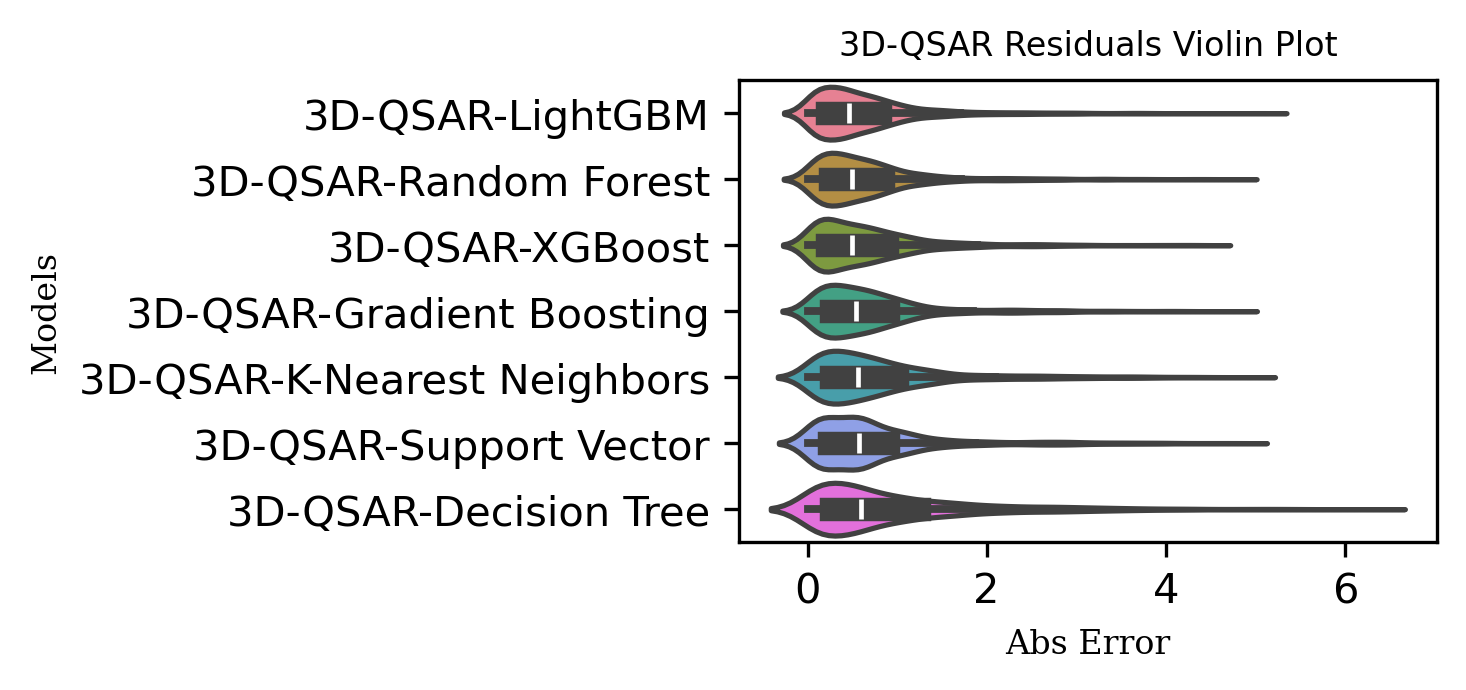

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 收集符合条件的残差数据
residuals_data = []
for name, result in results.items():
    if name.startswith("3D-QSAR"):
        if result["MSE"] > 10:  # 跳过 MSE 大于 10 的模型
            continue
        model_residuals = pd.DataFrame({"Model": name, "Error": result["error"]})
        residuals_data.append(model_residuals)

# 合并所有残差数据
residuals_df = pd.concat(residuals_data, ignore_index=True)
residuals_df.sort_values(by="Error", ascending=True, inplace=True)
model_order = residuals_df.groupby("Model")["Error"].median().sort_values(ascending=True).index

# 设置颜色映射
palette = sns.color_palette("husl", len(model_order))

# 使用seaborn绘制小提琴图
plt.figure(figsize=(3, 2), dpi=300)
font = {'family': 'serif',
        'color': 'black',
        'weight': 'normal',
        'size': 8}

sns.violinplot(
    y="Model",
    x="Error",
    data=residuals_df,
    order=model_order,
    scale="width",
    inner="box",
    palette=palette
)

# 添加标注：最大值和最小值
for index, model in enumerate(model_order):
    model_errors = residuals_df[residuals_df["Model"] == model]["Error"]
    max_value = model_errors.max()
    min_value = model_errors.min()

    # # 在最大值处标注
    # plt.text(
    #     max_value,  # x 坐标为最大值
    #     index + 0.2,  # y 坐标稍微偏移
    #     f"Max: {max_value:.2f}",  # 最大值标注
    #     ha="center", va="center", fontsize=10, color="red", fontweight="bold"
    # )

    # 在最小值处标注
    # plt.text(
    #     min_value,  # x 坐标为最小值
    #     index - 0.2,  # y 坐标稍微偏移
    #     f"Min: {min_value:.2f}",  # 最小值标注
    #     ha="center", va="center", fontsize=10, color="blue", fontweight="bold"
    # )

# 设置标题和坐标轴标签
plt.xlabel("Abs Error", fontdict=font)
plt.ylabel("Models", fontdict=font)
plt.title("3D-QSAR Residuals Violin Plot", fontsize=8)
plt.show()


### Unimol

In [ ]:
from unimol_tools import MolTrain

clf = MolTrain(task='regression',
                data_type='molecule',
                epochs=50,
                learning_rate=0.0001,
                batch_size=16,
                early_stopping=10,
                metrics='mse',
                split='random',
                save_path='./exp_reg_hERG_0616',
              )

clf.fit('datasets/hERG_train.csv')

2024-11-24 01:51:19 | unimol_tools/weights/weighthub.py | 17 | INFO | Uni-Mol Tools | Weights will be downloaded to default directory: /home/jhe378/anaconda3/envs/py39/lib/python3.9/site-packages/unimol_tools/weights
2024-11-24 01:51:20 | unimol_tools/data/datareader.py | 188 | INFO | Uni-Mol Tools | Anomaly clean with 3 sigma threshold: 7363 -> 7232
2024-11-24 01:51:29 | unimol_tools/data/conformer.py | 122 | INFO | Uni-Mol Tools | Start generating conformers...
7232it [01:54, 63.41it/s]
2024-11-24 01:53:23 | unimol_tools/data/conformer.py | 126 | INFO | Uni-Mol Tools | Succeeded in generating conformers for 99.99% of molecules.
2024-11-24 01:53:23 | unimol_tools/data/conformer.py | 128 | INFO | Uni-Mol Tools | Succeeded in generating 3d conformers for 99.90% of molecules.
2024-11-24 01:53:23 | unimol_tools/train.py | 178 | INFO | Uni-Mol Tools | Output directory already exists: ./exp_reg_hERG_0616
2024-11-24 01:53:23 | unimol_tools/train.py | 179 | INFO | Uni-Mol Tools | Warning: Ove

In [ ]:
from unimol import MolPredict
from sklearn.metrics import mean_squared_error

predm = MolPredict(load_model='./exp_reg_hERG_0616')
pred_train_y = predm.predict('datasets/hERG_train.csv').reshape(-1)
pred_test_y = predm.predict('datasets/hERG_test.csv').reshape(-1)

mse = mean_squared_error(test_y, pred_test_y)
se = abs(test_y - pred_test_y)
results[f"Uni-Mol"] = {"MSE": mse, "error": se}
print(f"[Uni-Mol]\tMSE:{mse:.4f}")